# Classification Report

In [2]:
import pandas as pd
from sklearn.metrics import classification_report


df1 = pd.read_csv('results_mobilnet.csv')  
df2 = pd.read_csv('results_my_model.csv')  

report1 = classification_report(df1['true_labels'], df1['predicted_labels'], output_dict=True)
report2 = classification_report(df2['true_labels'], df2['predicted_labels'], output_dict=True)

report_df1 = pd.DataFrame(report1).transpose()
report_df2 = pd.DataFrame(report2).transpose()

comparison = pd.concat([report_df1, report_df2], axis=1, keys=['Model1', 'Model2'])
print(comparison)


                Model1                                   Model2            \
             precision    recall  f1-score    support precision    recall   
0             0.962963  1.000000  0.981132  26.000000  0.925926  0.961538   
1             0.928571  0.650000  0.764706  20.000000  0.923077  0.600000   
2             0.720000  0.900000  0.800000  20.000000  0.692308  0.900000   
accuracy      0.863636  0.863636  0.863636   0.863636  0.833333  0.833333   
macro avg     0.870511  0.850000  0.848613  66.000000  0.847104  0.820513   
weighted avg  0.878916  0.863636  0.860660  66.000000  0.854269  0.833333   

                                   
              f1-score    support  
0             0.943396  26.000000  
1             0.727273  20.000000  
2             0.782609  20.000000  
accuracy      0.833333   0.833333  
macro avg     0.817759  66.000000  
weighted avg  0.829181  66.000000  


Model1 vs. Model2 Summary
Class 0: Model1 is better (higher precision, recall, and f1-score).
Class 1: Model1 has better precision and f1-score, but both models struggle with recall.
Class 2: Model1 is slightly better in precision and f1-score; recall is the same.
Accuracy: Model1 (0.8636) > Model2 (0.8333).
Macro & Weighted Avg: Model1 outperforms Model2 in all metrics.
Conclusion: Model1 performs better overall.

# Cohen's Kappa Score

In [3]:
from sklearn.metrics import cohen_kappa_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
kappa_1 = cohen_kappa_score(df1['true_labels'], df1['predicted_labels'])
kappa_2 = cohen_kappa_score(df2['true_labels'], df2['predicted_labels'])

print(f"Model 1 Cohen's Kappa: {kappa_1:.4f}")
print(f"Model 2 Cohen's Kappa: {kappa_2:.4f}")

Model 1 Cohen's Kappa: 0.7933
Model 2 Cohen's Kappa: 0.7474


Cohen's Kappa measures the agreement between true and predicted labels, adjusted for chance.

Model 1 Kappa = 0.7933 → Strong agreement
Model 2 Kappa = 0.7474 → Moderate to strong agreement
Conclusion: Model 1 shows better consistency and agreement with true labels, suggesting more reliable predictions.

# One-vs-Rest (OvR)

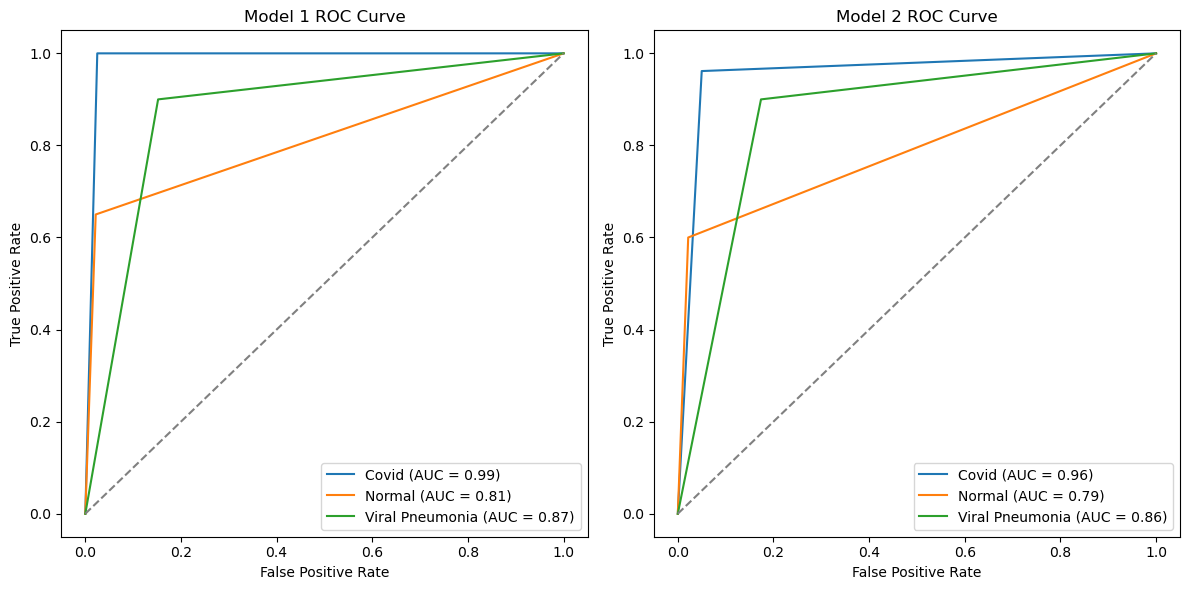

In [4]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

class_names = ['Covid', 'Normal', 'Viral Pneumonia']

y_true_bin1 = label_binarize(df1['true_labels'], classes=[0, 1, 2])
y_pred_bin1 = label_binarize(df1['predicted_labels'], classes=[0, 1, 2])

y_true_bin2 = label_binarize(df2['true_labels'], classes=[0, 1, 2])
y_pred_bin2 = label_binarize(df2['predicted_labels'], classes=[0, 1, 2])

plt.figure(figsize=(12, 6))

# Model 1
plt.subplot(1, 2, 1)
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin1[:, i], y_pred_bin1[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Model 1 ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# Model 2
plt.subplot(1, 2, 2)
for i in range(len(class_names)):
    fpr, tpr, _ = roc_curve(y_true_bin2[:, i], y_pred_bin2[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_names[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Model 2 ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.tight_layout()
plt.show()

Comparison of the ROC Curves for Model 1 and Model 2:
Covid Detection:

Model 1: AUC = 0.99 → Almost perfect classification.
Model 2: AUC = 0.96 → Very high accuracy, but slightly worse than Model 1.
Normal Detection:

Model 1: AUC = 0.81 → Good classification performance.
Model 2: AUC = 0.79 → Slightly lower performance than Model 1, but still strong.
Viral Pneumonia Detection:

Model 1: AUC = 0.87 → Strong classification performance.
Model 2: AUC = 0.86 → Very close to Model 1, almost identical performance.
Conclusion:
Model 1 shows better overall classification performance, especially for Covid detection (AUC = 0.99 vs. 0.96).
Model 1 also performs slightly better for Normal cases, while Viral Pneumonia detection is almost identical between the two models.
Model 1 is overall more reliable due to its higher AUC values in all categories.

# Classification Report

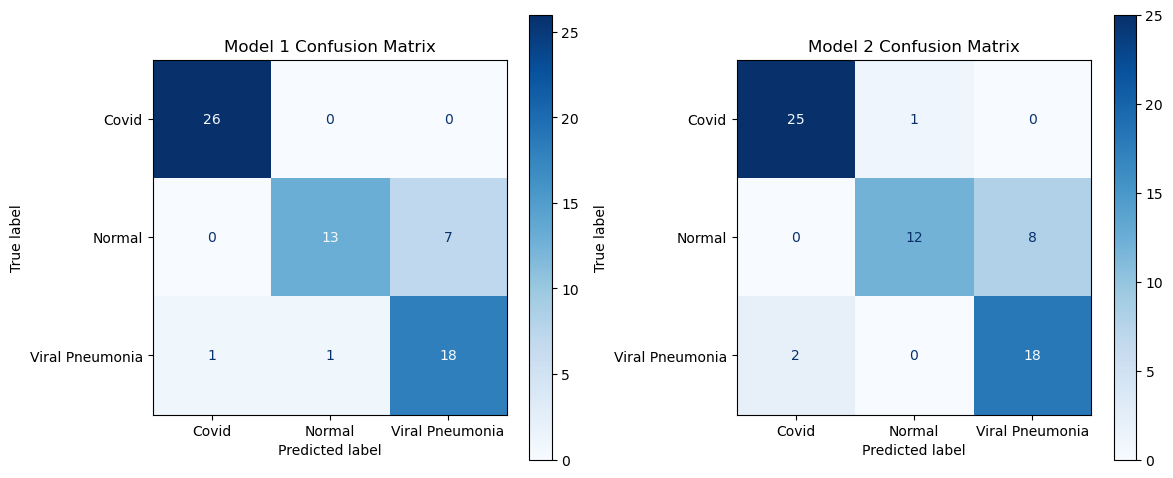

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Model 1
cm1 = confusion_matrix(df1['true_labels'], df1['predicted_labels'])
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=class_names)
disp1.plot(cmap=plt.cm.Blues, ax=ax[0])
ax[0].set_title("Model 1 Confusion Matrix")

# Model 2
cm2 = confusion_matrix(df2['true_labels'], df2['predicted_labels'])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_names)
disp2.plot(cmap=plt.cm.Blues, ax=ax[1])
ax[1].set_title("Model 2 Confusion Matrix")

plt.tight_layout()
plt.show()

Summary:
Model 1:
Excellent at detecting Covid (26/26).
Good at detecting Normal (13/20), but confused 7 cases with Viral Pneumonia.
High accuracy for Viral Pneumonia (18/20).

Model 2:
Slightly lower accuracy for Covid (25/26).
More confusion between Normal and Viral Pneumonia (12/20 vs. 8 misclassified).
Similar performance on Viral Pneumonia (18/20).

Conclusion: Model 1 performs better on Covid and Normal cases, while both models are strong on Viral Pneumonia.